# WORKFLOW :
Load Data

Check Missing Values ( If Exist ; Fill each record with mean of its feature )


Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).


Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh 

(check by experiment).


Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)


Train the Model with Epochs (100) and validate it


If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout 

layer or add Regularizer according to the need .


Evaluation Step


Prediction 

# first step : Load all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt

In [2]:
from sklearn.model_selection import train_test_split

# second step :load data

In [3]:
dataframe = pd.read_csv(r"C:\Users\Waleed\Desktop\data analysis\Deep learning\compresive_strength_concrete assignment  1.csv")

In [4]:
#print (dataframe)
#dataframe
#display(dataframe)

# Check Missing Values ( If Exist ; Fill each record with mean of its feature )

In [5]:
dataframe.head()# checking data proper clearly

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
dataframe.head().isnull()#isnull new DataFrame with True & False data 

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [7]:
dataframe.isnull().sum().sum()#they function how many NaN in your data "the DataFrame returned by isnull() will give the count of total NaN in dataframe".

0

In [8]:
dataframe.isnull().sum()#if i one remove sum() the DataFrame returned by isnull() will give a series containing data about count of NaN 

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [9]:
dataframe.columns=["cement","blast","flyash","water","superplasticiser","coarse","fine","age","ccs"]#change its columns name


In [10]:
dataframe.index

RangeIndex(start=0, stop=1030, step=1)

In [11]:
dataframe

,cement,blast,flyash,water,superplasticiser,coarse,fine,age,ccs
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [12]:
col = list(dataframe.columns)#changen all data conver into NaN values 
for i in col:
    dataframe[i]=(dataframe[i]-dataframe[i].mean())/dataframe[i].std(ddof=0)
#dataframe.head()
#print (dataframe)
#display(dataframe)
#dataframe
#dataframe.cement
#col
#dataframe[i].mean

In [13]:
#plt.hist(dataframe)#hist function show graph and array and take time

# feature

In [14]:
target=dataframe.age
features=dataframe.drop("ccs", axis = 1)
#features=dataframe.drop("ccs",axis = 1)#axis must be 1 always Remove rows or columns by specifying label names
# specifying directly index or column names.


In [15]:
print (target)
features

0      -0.279733
1      -0.279733
2       3.553066
3       5.057677
4       4.978487
          ...   
1025   -0.279733
1026   -0.279733
1027   -0.279733
1028   -0.279733
1029   -0.279733
Name: age, Length: 1030, dtype: float64


,cement,blast,flyash,water,superplasticiser,coarse,fine,age
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487
...,...,...,...,...,...,...,...,...
1025,-0.045645,0.488235,0.564545,-0.092171,0.451410,-1.323005,-0.065893,-0.279733
1026,0.392819,-0.856888,0.960068,0.676200,0.702626,-1.994680,0.496893,-0.279733
1027,-1.270088,0.759579,0.850635,0.521589,-0.017528,-1.036064,0.080107,-0.279733
1028,-1.168610,1.308065,-0.847144,-0.279579,0.853356,0.214641,0.191166,-0.279733


# Step 3 :  Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

In [16]:
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size = 0.2,train_size = 0.8)#yaha sa kr na hai


#X_train,X_test,Y_train,Y_test=train_test_split(features,target,test_size=0.2)

#X_train.head()

# check number of len

In [17]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

824
206
824
206


# check  number in shape

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(824, 8)
(206, 8)
(824,)
(206,)


# step 4 
## Model : input Layer (No. of features )

## 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh

In [19]:
from tensorflow.keras.models import Sequential # its use densly connected layers
from tensorflow.keras.layers import Dense # dense function first create array
from tensorflow.keras.layers import Activation# activation function built in "relu"


In [20]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [21]:
from tensorflow.keras.models import Sequential # its use densly connected layers
from tensorflow.keras.layers import Dense # dense function first create array
from tensorflow.keras.layers import Activation# activation function built in "relu"
#encoded_y_test

In [22]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


# Step : 5     

# Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)

In [23]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step : 6 Train the Model with Epochs (100) and validate it


## If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer     or add regularizer according to the need


In [24]:
# model.fit(X_train, y_train, epochs=100, shuffle=True, verbose =1)
#model.fit(X_train, y_train, epochs=100, batch_size=10)

model.fit(x_train, y_train,epochs=100,batch_size=128,validation_split=0.2)

NameError: name 'x_train' is not defined

# Evaluation Step

In [ ]:
#accuracy = model.evaluate(features,target)
model.evaluate(X_test, Y_test)[1]
#print('acc: %.2f' % (accuracy*100))

In [ ]:
dataframe.values

# Prediction

In [ ]:
from sklearn import ensemble
from sklearn.metrics import r2_score

In [ ]:
params = {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

In [ ]:
clf = ensemble.GradientBoostingRegressor(**params)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
print(r2_score(y_test, clf.predict(X_test)))

In [26]:
import seaborn as sns

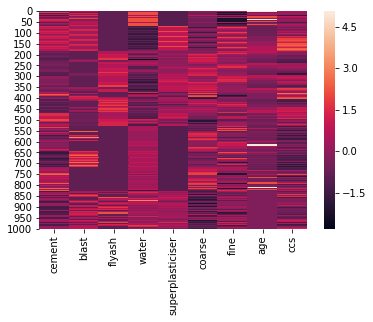

In [27]:
sns.heatmap(dataframe)

In [28]:
#import matplotlib.pylab as plt


In [40]:
#plt.imshow(target)